# Reptile Detector
> Crocodile, Alligator, Caiman. 

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [2]:
# Crocodile, Alligator, Caiman Detector

# > A CNN model. 
# - toc: true 
# - badges: true
# - comments: true
# - categories: [jupyter]
# - image: images/chart-preview.png
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
voila 0.2.4 requires nbconvert<7,>=6.0.0, but you'll have nbconvert 5.6.1 which is incompatible.


In [1]:
import os
key = os.environ.get('AZURE_SEARCH_KEY', 'Key omitted for security')

In [6]:
reptile_types = 'crocodile','alligator plushies', 'renekton'
path = Path('reptiles')

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in reptile_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o}')
#         download_images(dest, urls=results.attrgot('content_url'))

In [7]:
fns = get_image_files(path)
fns

(#444) [Path('reptiles/alligator/00000000.jpg'),Path('reptiles/alligator/00000001.jpg'),Path('reptiles/alligator/00000002.jpg'),Path('reptiles/alligator/00000003.jpg'),Path('reptiles/alligator/00000004.jpg'),Path('reptiles/alligator/00000005.jpg'),Path('reptiles/alligator/00000006.jpg'),Path('reptiles/alligator/00000007.jpg'),Path('reptiles/alligator/00000008.jpg'),Path('reptiles/alligator/00000009.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#7) [Path('reptiles/alligator/00000002.jpg'),Path('reptiles/caiman/00000021.jpg'),Path('reptiles/caiman/00000071.jpg'),Path('reptiles/caiman/00000115.JPG'),Path('reptiles/crocodile/00000017.jpg'),Path('reptiles/crocodile/00000036.jpg'),Path('reptiles/crocodile/00000089.jpg')]

In [9]:
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

(#0) []

In [37]:
class DataLoaders(GetAttr):
    num_workers=0
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i, self: self[i])
        

In [38]:
reptiles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [39]:
dls = reptiles.dataloaders(path)

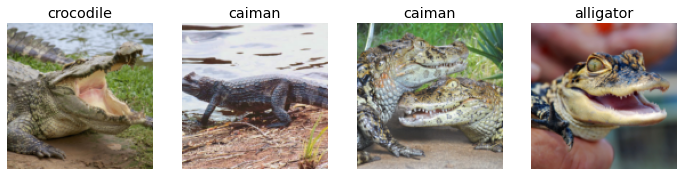

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)


In [42]:
reptiles = reptiles.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                        batch_tfms=aug_transforms())
dls = reptiles.dataloaders(path, num_workers=0) # <- num_workers=0 to prevent window error

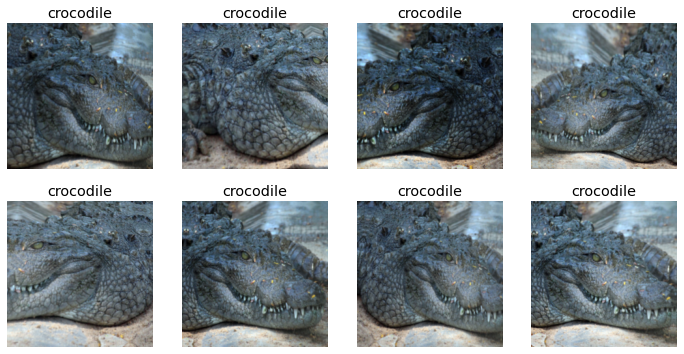

In [25]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [43]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.970919,1.043408,0.436782,00:26


D:\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.344288,0.993782,0.413793,00:25
1,1.237567,1.008499,0.402299,00:25
2,1.032747,0.994638,0.333333,00:25
3,0.935045,0.998598,0.321839,00:25


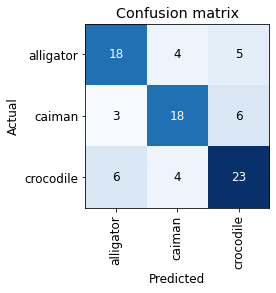

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

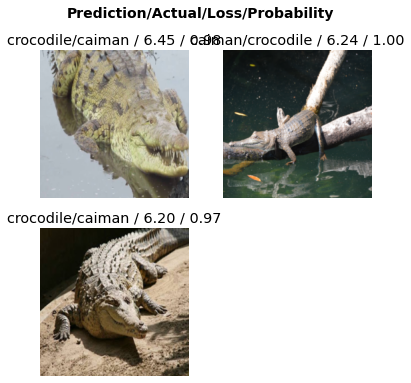

In [49]:
interp.plot_top_losses(3,nrows=2)

In [61]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [59]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink() # delete 

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'reptiles\\crocodile\\00000102.jpg'

In [60]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [63]:
reptiles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [64]:
reptiles = reptiles.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                        batch_tfms=aug_transforms())
dls = reptiles.dataloaders(path, num_workers=0) # <- num_workers=0 to prevent window error

In [65]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.024061,1.739658,0.593023,00:23


epoch,train_loss,valid_loss,error_rate,time
0,1.284611,1.220839,0.500000,00:23
1,1.172451,1.031749,0.348837,00:24
2,1.023675,1.042305,0.313953,00:24
3,0.893127,1.034520,0.325581,00:24


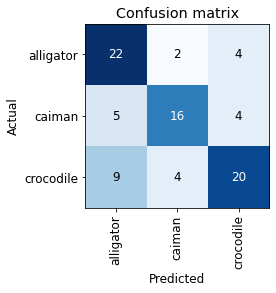

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

A little bit better! But still horrible!

## Conclusion

I am not a reptile expert so I cannot tell the difference alligators and crocodiles unless their snouts are clearly shown from top-down view.. Implying that I cannot clean up the messy data efficiently. One solution is to gather more and better data but I'm not that interested in this topic anymore so I will stop here. Honestly, I'm surprised the CNN was able to somewhat tell with the given datas.